In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [53]:
df = pd.read_csv('/content/drive/MyDrive/python/Housing.csv')
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [55]:
df.shape

(545, 13)

In [56]:
df.drop(['area'],axis = 1, inplace=True)

In [57]:
df.head()

,price,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,4,1,2,yes,yes,yes,no,yes,2,no,furnished


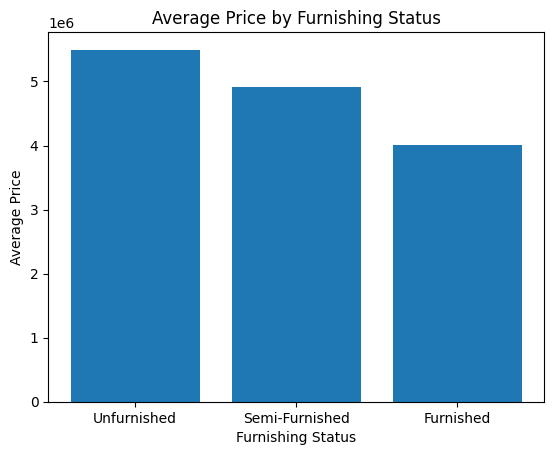

In [58]:
price_furnishing = df.groupby('furnishingstatus')['price'].mean()
plt.bar(price_furnishing.index, price_furnishing.values)
plt.xlabel('Furnishing Status')
plt.ylabel('Average Price')
plt.title('Average Price by Furnishing Status')
plt.xticks(price_furnishing.index, ['Unfurnished', 'Semi-Furnished', 'Furnished'])
plt.show()

In [59]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['mainroad'] = le.fit_transform(df['mainroad'])
df['guestroom'] = le.fit_transform(df['guestroom'])
df['basement'] = le.fit_transform(df['basement'])
df['hotwaterheating'] = le.fit_transform(df['hotwaterheating'])
df['airconditioning'] = le.fit_transform(df['airconditioning'])
df['prefarea'] = le.fit_transform(df['prefarea'])
df['furnishingstatus'] = le.fit_transform(df['furnishingstatus'])
df.head()

,price,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,4,2,3,1,0,0,0,1,2,1,0
1,12250000,4,4,4,1,0,0,0,1,3,0,0
2,12250000,3,2,2,1,0,1,0,0,2,1,1
3,12215000,4,2,2,1,0,1,0,1,3,1,0
4,11410000,4,1,2,1,1,1,0,1,2,0,0


In [60]:
X = df.drop(['price'],axis=1)
y = df['price']

In [61]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [62]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [63]:
from sklearn.metrics import r2_score, mean_squared_error
accuracy = r2_score(y_test, y_pred)
print('Accuracy (R2_Score): ', accuracy*100)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Accuracy (R2_Score):  60.20336169706939
Mean Squared Error: 2011549038711.3318
